Code in this file was generated by ChatGPT, and subsequently modified

In [22]:
pwd

'/home/xjaros2/Documents/git/csidh-setup/csidh-target/scripts'

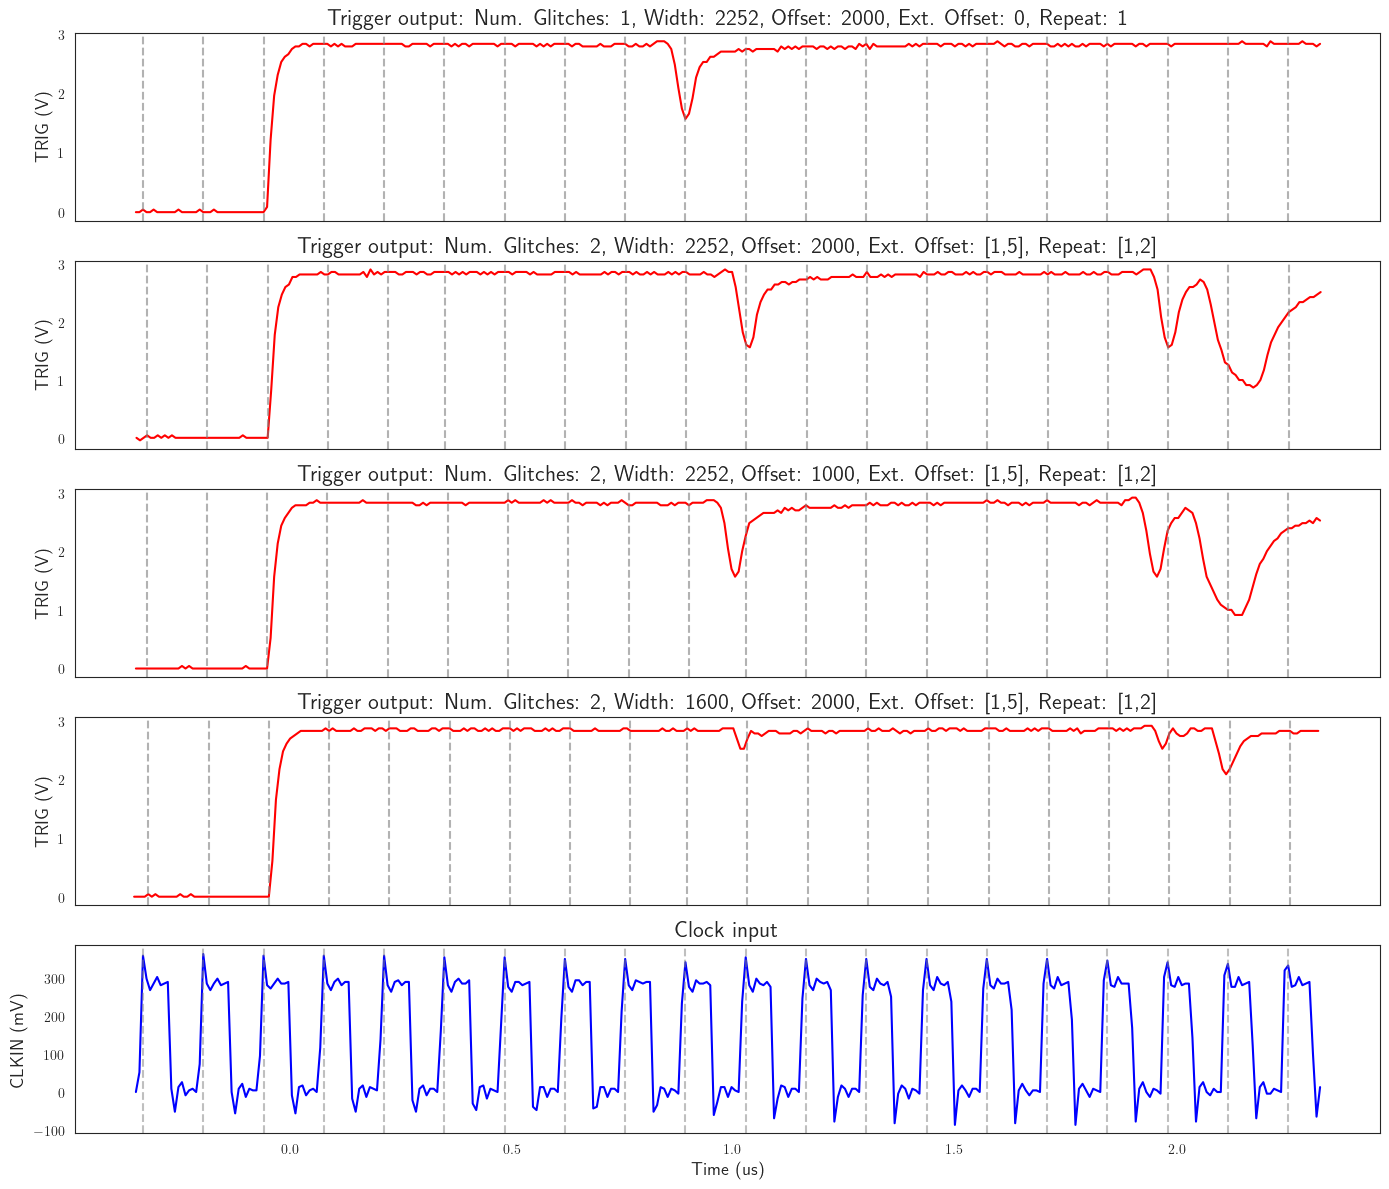

In [60]:
# Re-import necessary libraries after kernel reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

TITLE_FONTSIZE = 16
YLABEL_FONTSIZE = 13
XLABEL_FONTSIZE = 13

plt.rcParams.update({
    "text.usetex": True,
    "ytick.color" : "black",
    "xtick.color" : "black",
    "axes.labelcolor" : "black",
    "axes.edgecolor" : "black",
    "font.family" : "serif",
    "font.serif" : ["Computer Modern Serif"]
})


# Reload the uploaded files
files = [
    "./data/waveforms/num1-width2252-offset-2000-ext-offset0.csv",
    "./data/waveforms/num2-width2252-offset-2000-ext-offset1,5-repeat-1,2.csv",
    "./data/waveforms/num2-width2252-offset-1000-ext-offset1,5-repeat-1,2.csv",
    "./data/waveforms/num2-width1600-offset-2000-ext-offset1,5-repeat-1,2.csv",
    
]

titles = [
    "Trigger output: Num. Glitches: 1, Width: 2252, Offset: 2000, Ext. Offset: 0, Repeat: 1",
    "Trigger output: Num. Glitches: 2, Width: 2252, Offset: 2000, Ext. Offset: [1,5], Repeat: [1,2]",
    "Trigger output: Num. Glitches: 2, Width: 2252, Offset: 1000, Ext. Offset: [1,5], Repeat: [1,2]",
    "Trigger output: Num. Glitches: 2, Width: 1600, Offset: 2000, Ext. Offset: [1,5], Repeat: [1,2]",
    

]

# Read and clean the files
dataframes = [pd.read_csv(file).iloc[1:].astype(float).reset_index(drop=True) for file in files]

# Trim each dataframe to the first third
trimmed_data = [df.iloc[len(df)//15:len(df)//3].reset_index(drop=True) for df in dataframes]

# Detect peaks in Channel B for each trace
peaks = [find_peaks(df["Channel B"], distance=10, prominence=10)[0] for df in trimmed_data]

# Plotting
# Recreate the plot with proper x-axis labeling on the last visible subplot
sns.set_style("white")
fig, axs = plt.subplots(5, 1, figsize=(14, 12), sharex=True, height_ratios=[1]*5)

# Plot Channel A for each trace
for i in range(4):
    sns.lineplot(ax=axs[i], x=trimmed_data[i]["Time"], y=trimmed_data[i]["Channel A"], color='red')
    for peak in peaks[i]:
        axs[i].axvline(x=trimmed_data[i]["Time"].iloc[peak], color='gray', linestyle='--', alpha=0.6)
    axs[i].set_ylabel(f"TRIG (V)", fontdict={"fontsize":YLABEL_FONTSIZE})
    axs[i].set_title(titles[i], fontdict={"fontsize":TITLE_FONTSIZE})
    axs[i].grid(False)

# Combined Channel B subplot with all gray vertical lines
colors = ['blue', 'green', 'purple', 'orange']
for i in range(1):
    sns.lineplot(ax=axs[4], x=trimmed_data[i]["Time"], y=trimmed_data[i]["Channel B"], color=colors[i])
    for peak in peaks[i]:
        axs[4].axvline(x=trimmed_data[i]["Time"].iloc[peak], color='gray', linestyle='--', alpha=0.5)

axs[4].set_ylabel("CLKIN (mV)", fontdict={"fontsize":YLABEL_FONTSIZE})
axs[4].set_title("Clock input", fontdict={"fontsize":TITLE_FONTSIZE})
axs[4].set_xlabel("Time (us)", fontdict={"fontsize":XLABEL_FONTSIZE})
# axs[4].legend()
axs[4].grid(False)

plt.tight_layout()
plt.savefig("parameter-effect-visualization.pdf")
plt.show()

<Figure size 640x480 with 0 Axes>